# Spotify -

In [1]:
import numpy as np
import scipy.stats 
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting
from IPython import display
from ipywidgets import interact,widgets 
%matplotlib inline
import re
import mailbox
import csv
import seaborn as sns

In [10]:
data_2010_2019=pd.read_excel("/Users/sakshiashutosh/Downloads/archive (7)/Spotify 2010 - 2019 Top 100 Songs.xlsx")

In [11]:
data_2010_2019

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [15]:
data_2010_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [16]:
data_2010_2019.describe()

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


### Column names with their meaning-
* Title- songs title
* Artist- Songs artist
* Genre- Genre of the song
* Year released-Year the song was released
* Added-Day song was added to the spotifys top hit plsylist
* bpm-Beats per minute (the tempo of the song)
* nrgy-Energy - How energetic the song is
* dnce-Danceability (How easy it is to dance to the song)
* dB-Decibel (How loud the song is)
* live-	How likely the song is a live recording
* val-	How positive the mood of the song is
* dur-Duration of the song
* acous-How acoustic the song is
* spch-The more the song is focused on spoken word
* pop-Popularity of the song (not a ranking)
* top year-Year the song was a top hit
* artist type-Tells if artist is solo, duo, trio, or a band



In [21]:
data_2010_2019.isnull().sum()

title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
dtype: int64

In [41]:
data_2010_2019.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [53]:
# data2010-2019 (top artist with max number of song)
data_2010_2019.artist.value_counts().sort_values(ascending=True).tail(15)  

Kendrick Lamar     9
Katy Perry         9
David Guetta       9
One Direction      9
Jason Derulo      10
Post Malone       10
Chris Brown       10
Ed Sheeran        10
Maroon 5          11
Bruno Mars        13
Ariana Grande     14
Rihanna           14
Calvin Harris     18
Drake             18
Taylor Swift      21
Name: artist, dtype: int64

In [ ]:
data_2010_2019.loc[[]]### recheck if its needed

In [59]:
data_2010_2019.artist.value_counts().sort_values(ascending=True)  ###recheck if its needed

Russ Millions          1
Noah And The Whale     1
Flume                  1
MAGIC!                 1
Garrett Nash           1
                      ..
Ariana Grande         14
Rihanna               14
Calvin Harris         18
Drake                 18
Taylor Swift          21
Name: artist, Length: 444, dtype: int64

In [47]:
data_2010_2019.columns.tolist()

['title',
 'artist',
 'top genre',
 'year released',
 'added',
 'bpm',
 'nrgy',
 'dnce',
 'dB',
 'live',
 'val',
 'dur',
 'acous',
 'spch',
 'pop',
 'top year',
 'artist type']

In [48]:
data_2010_2019.rename(columns={ 'top genre':'top_genre', 'year released':'year_released', 'top year':'top_year',
 'artist type':'artist_type'},inplace=True)

In [49]:
data_2010_2019

,title,artist,top_genre,year_released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_year,artist_type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [96]:
x=data_2010_2019.top_genre.value_counts().sort_values(ascending=False).head(15)

In [55]:
data_2010_2019.year_released.value_counts().sort_values(ascending=False)

2018    112
2012    109
2014    101
2017     99
2015     99
2010     94
2011     93
2019     87
2013     86
2016     86
2009     24
2020      6
2021      3
1975      1
Name: year_released, dtype: int64

In [57]:
data_2010_2019.corr()

,year_released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_year
year_released,1.000000,-0.017916,-0.237744,0.222459,-0.116566,-0.115106,-0.091306,-0.248134,0.151539,0.149373,0.182793,0.854339
bpm,-0.017916,1.000000,0.118557,-0.111660,0.089568,0.014672,0.021128,-0.016536,-0.124614,0.149368,-0.025058,-0.016887
nrgy,-0.237744,0.118557,1.000000,-0.129279,0.713428,0.184094,0.372866,-0.049662,-0.504083,-0.099790,-0.234011,-0.302535
dnce,0.222459,-0.111660,-0.129279,1.000000,-0.040538,-0.113324,0.264781,-0.168483,-0.075999,0.161734,0.093176,0.218019
dB,-0.116566,0.089568,0.713428,-0.040538,1.000000,0.128134,0.317128,-0.082541,-0.392393,-0.165838,-0.145403,-0.173286
live,-0.115106,0.014672,0.184094,-0.113324,0.128134,1.000000,0.028092,-0.003094,-0.116081,0.043516,-0.137305,-0.121331
val,-0.091306,0.021128,0.372866,0.264781,0.317128,0.028092,1.000000,-0.185863,-0.164048,0.013192,-0.003752,-0.122825
dur,-0.248134,-0.016536,-0.049662,-0.168483,-0.082541,-0.003094,-0.185863,1.000000,0.026474,-0.035451,0.009219,-0.215213
acous,0.151539,-0.124614,-0.504083,-0.075999,-0.392393,-0.116081,-0.164048,0.026474,1.000000,-0.010204,0.128195,0.181747
spch,0.149373,0.149368,-0.099790,0.161734,-0.165838,0.043516,0.013192,-0.035451,-0.010204,1.000000,0.061441,0.165890


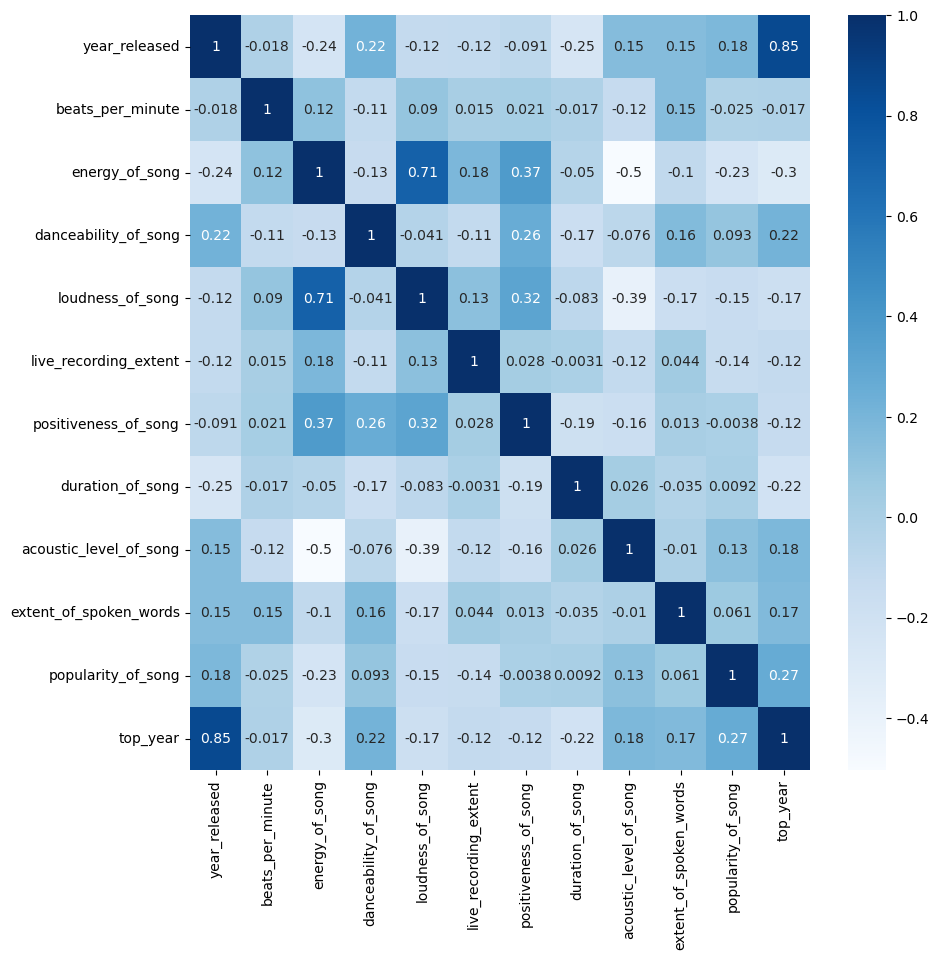

In [133]:
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(data_2010_2019.corr(),annot=True,cmap="Blues")
for i in ax.containers:
    ax.bar_label(i)


In [61]:
data_2010_2019.groupby('artist').year_released.value_counts().sort_values(ascending=False).head(10)

artist          year_released
Calvin Harris   2012             8
Kesha           2010             6
Taylor Swift    2014             6
Kendrick Lamar  2017             5
Rihanna         2010             5
Selena Gomez    2015             5
Cardi B         2018             5
Drake           2018             5
Katy Perry      2012             5
Bruno Mars      2010             5
Name: year_released, dtype: int64

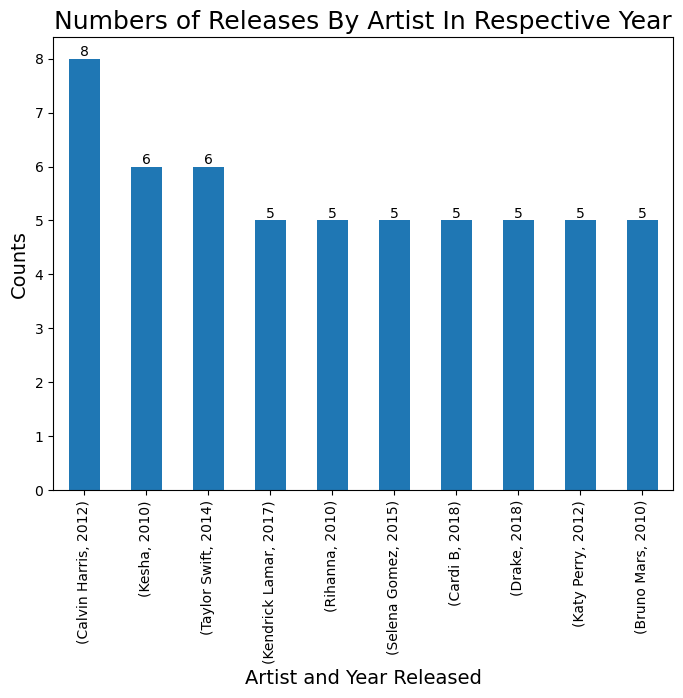

In [139]:
plt.figure(figsize=(8,6),dpi=100)
ax=data_2010_2019.groupby('artist').year_released.value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel("Artist and Year Released",fontsize=14)
plt.ylabel("Counts",fontsize=14)
plt.title("Numbers of Releases By Artist In Respective Year",fontsize=18)
for i in ax.containers:
    ax.bar_label(i)


In [103]:
data_2010_2019.groupby("artist").top_genre.value_counts().sort_values(ascending=False).head(15)

artist          top_genre        
Taylor Swift    pop                  21
Calvin Harris   dance pop            18
Drake           canadian hip hop     18
Rihanna         barbadian pop        14
Ariana Grande   dance pop            14
Bruno Mars      dance pop            13
Maroon 5        pop                  11
Chris Brown     dance pop            10
Jason Derulo    dance pop            10
Ed Sheeran      pop                  10
Post Malone     dfw rap              10
Kendrick Lamar  conscious hip hop     9
One Direction   boy band              9
Katy Perry      dance pop             9
David Guetta    big room              9
Name: top_genre, dtype: int64

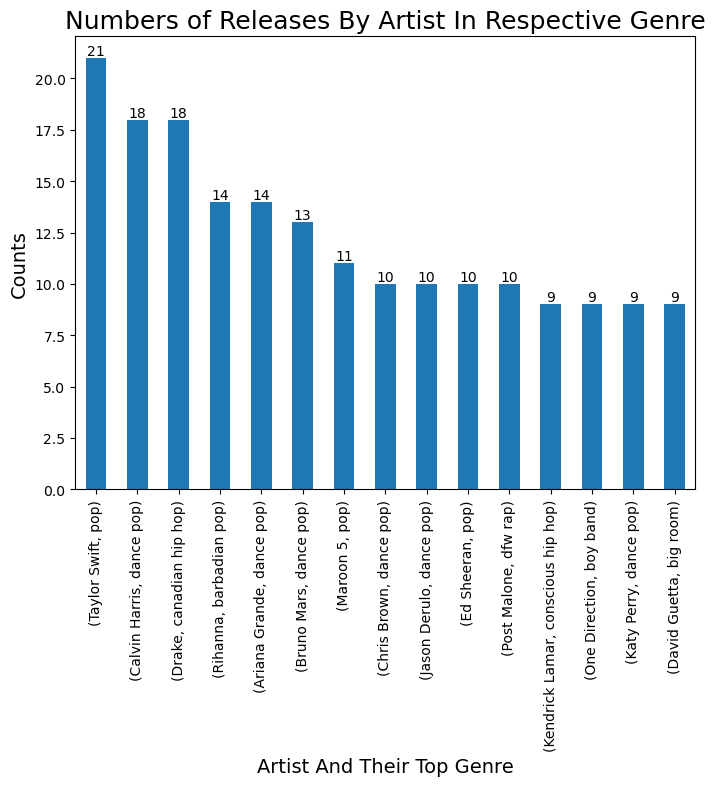

In [140]:
plt.figure(figsize=(8,6),dpi=100)
ax=data_2010_2019.groupby("artist").top_genre.value_counts().sort_values(ascending=False).head(15).plot(kind='bar')
plt.xlabel("Artist And Their Top Genre",fontsize=14)
plt.ylabel("Counts",fontsize=14)
plt.title("Numbers of Releases By Artist In Respective Genre",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)


In [68]:
data_2010_2019.bpm.sort_values(ascending=False).head(10)

563    206
109    206
898    204
227    202
969    202
837    200
862    198
426    196
517    196
681    192
Name: bpm, dtype: int64

In [111]:
data_2010_2019.rename(columns={"bpm":"beats_per_minute","nrgy":"energy_of_song","dnce":"danceability_of_song",
                              "dB":"loudness_of_song","live":"live_recording_extent","val":"positiveness_of_song",
                              "dur":"duration_of_song","acous":"acoustic_level_of_song","spch":"extent_of_spoken_words"
                              ,"pop":"popularity_of_song"},inplace=True)

In [115]:
high_bpm=data_2010_2019.iloc[[563,109,898,227,969,837,862,426,517,681]]
high_bpm

,title,artist,top_genre,year_released,added,beats_per_minute,energy_of_song,danceability_of_song,loudness_of_song,live_recording_extent,positiveness_of_song,duration_of_song,acoustic_level_of_song,extent_of_spoken_words,popularity_of_song,top_year,artist_type
563,FourFiveSeconds,Rihanna,barbadian pop,2015,2020‑06‑19,206,27,58,-6,13,35,188,88,5,82,2015,Solo
109,Honey Bee,Blake Shelton,contemporary country,2011,2020‑06‑16,206,85,48,-5,12,72,211,0,4,69,2011,Solo
898,"BIG BANK (feat. 2 Chainz, Big Sean, Nicki Minaj)",YG,cali rap,2018,2020‑06‑22,204,35,75,-8,9,11,237,1,33,73,2018,Solo
227,The Motto,Drake,canadian hip hop,2011,2020‑06‑22,202,44,77,-9,11,39,182,0,36,79,2012,Solo
969,Pure Water (with Migos),Mustard,cali rap,2019,2020‑06‑22,202,56,68,-6,34,14,192,17,13,80,2019,Solo
837,Simple,Florida Georgia Line,contemporary country,2019,2020‑06‑22,200,88,36,-4,15,86,185,8,10,75,2018,Duo
862,Corazón (feat. Nego do Borel),Maluma,latin,2018,2020‑06‑22,198,74,72,-6,20,75,185,33,25,74,2018,Solo
426,You Know You Like It,DJ Snake,dance pop,2014,2020‑06‑10,196,73,41,-5,31,25,247,1,19,75,2014,Solo
517,You Know You Like It,DJ Snake,dance pop,2014,2020‑06‑19,196,73,41,-5,31,25,247,1,19,74,2015,Solo
681,The Greatest (feat. Kendrick Lamar),Sia,australian dance,2016,2020‑06‑08,192,73,67,-6,6,73,210,1,27,73,2016,Solo


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


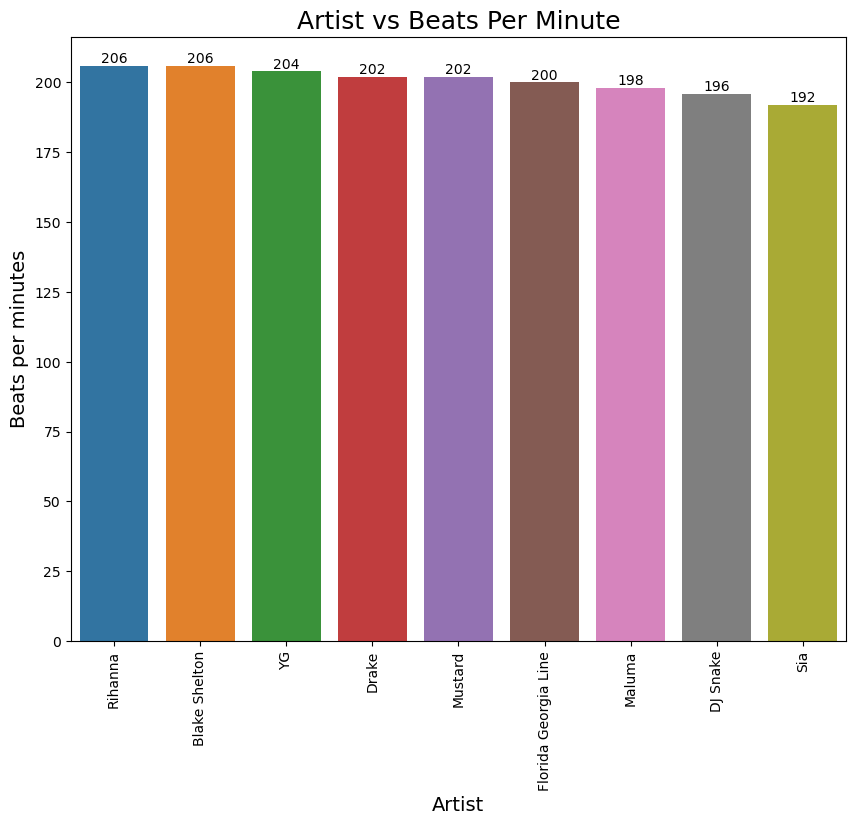

In [132]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_bpm.artist,high_bpm.beats_per_minute)
plt.xlabel("Artist",fontsize=14)
plt.ylabel("Beats per minutes",fontsize=14)
plt.title("Artist vs Beats Per Minute",fontsize=18)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)


In [69]:
data_2010_2019.nrgy.sort_values(ascending=False).head(10)

312    98
70     98
284    97
254    97
88     97
422    97
380    96
116    96
225    96
475    96
Name: nrgy, dtype: int64

In [150]:
high_energy=data_2010_2019.loc[[312,70,284,254,88,422,380,116,225,475]]

In [151]:
high_energy

,title,artist,top_genre,year_released,added,beats_per_minute,energy_of_song,danceability_of_song,loudness_of_song,live_recording_extent,positiveness_of_song,duration_of_song,acoustic_level_of_song,extent_of_spoken_words,popularity_of_song,top_year,artist_type
312,Get Up (Rattle),Bingo Players,big room,2013,2020‑06‑11,128,98,80,-3,26,80,167,2,7,61,2013,Duo
70,Riverside,Sidney Samson,dutch house,2009,2022‑02‑17,126,98,80,-2,13,29,321,0,5,42,2010,Solo
284,Bangarang (feat. Sirah),Skrillex,brostep,2011,2020‑06‑29,110,97,72,-2,32,58,215,1,20,75,2012,Solo
254,BURN IT DOWN,Linkin Park,alternative metal,2012,2020‑06‑22,110,97,59,-4,7,59,230,1,5,79,2012,Band/Group
88,Written in the Stars (feat. Eric Turner),Tinie Tempah,dance pop,2010,2022‑02‑17,123,97,62,-3,20,30,208,5,13,51,2010,Solo
422,Bad (feat. Vassy) - Radio Edit,David Guetta,big room,2014,2020‑06‑10,128,97,61,-4,33,41,171,0,9,56,2014,Solo
380,Don't Stop the Party (feat. TJR),Pitbull,dance pop,2012,2020‑06‑11,127,96,72,-4,38,95,206,1,9,69,2013,Solo
116,Bounce (feat. Kelis) - Radio Edit,Calvin Harris,dance pop,2012,2020‑06‑16,128,96,78,-2,66,76,222,3,4,67,2011,Solo
225,Hot Right Now - Edit,DJ Fresh,dancefloor dnb,2010,2020‑06‑22,175,96,51,-2,12,39,179,1,4,41,2012,Solo
475,Timber (feat. Ke$ha),Pitbull,dance pop,2012,2020‑06‑10,130,96,58,-4,14,79,204,3,10,86,2014,Solo


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


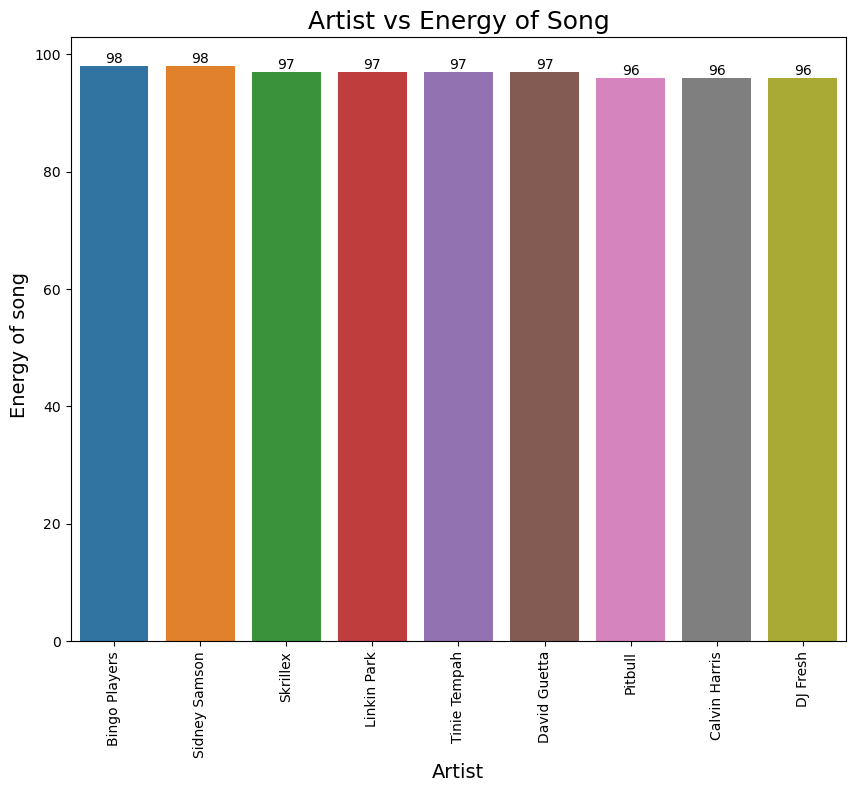

In [153]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_energy.artist,high_energy.energy_of_song)
plt.xlabel("Artist",fontsize=14)
plt.ylabel("Energy of song  ",fontsize=14)
plt.title("Artist vs Energy of Song",fontsize=18)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)


In [70]:
data_2010_2019.dnce.sort_values(ascending=False).head(10)

461    96
856    96
923    95
750    94
705    94
801    93
764    93
717    93
725    93
188    93
Name: dnce, dtype: int64

In [156]:
max_dance=data_2010_2019.loc[[461,856,923,750,705,801,764,717,725,188]]
max_dance

,title,artist,top_genre,year_released,added,beats_per_minute,energy_of_song,danceability_of_song,loudness_of_song,live_recording_extent,positiveness_of_song,duration_of_song,acoustic_level_of_song,extent_of_spoken_words,popularity_of_song,top_year,artist_type
461,Anaconda,Nicki Minaj,dance pop,2014,2020‑06‑10,130,61,96,-6,21,65,260,7,18,70,2014,Solo
856,Yes Indeed,Lil Baby,atl hip hop,2018,2020‑06‑22,120,35,96,-9,11,56,142,4,53,84,2018,Solo
923,Money,Cardi B,dance pop,2018,2020‑06‑22,130,59,95,-7,11,22,184,1,29,78,2019,Solo
750,Gucci Gang,Lil Pump,emo rap,2017,2021‑01‑28,120,52,94,-7,12,70,124,24,6,69,2017,Solo
705,Caroline,Aminé,hip hop,2017,2021‑01‑28,120,34,94,-10,26,71,210,17,51,80,2017,Solo
801,FEFE,6ix9ine,emo rap,2018,2020‑06‑22,126,39,93,-9,14,38,179,9,41,75,2018,Solo
764,Bad and Boujee (feat. Lil Uzi Vert),Migos,atl hip hop,2017,2021‑01‑28,127,67,93,-5,12,17,343,6,24,78,2017,Trio
717,Bodak Yellow,Cardi B,dance pop,2018,2021‑01‑28,125,70,93,-6,23,49,224,7,10,77,2017,Solo
725,Fake Love,Drake,canadian hip hop,2017,2021‑01‑28,134,48,93,-9,18,61,211,11,29,78,2017,Solo
188,Loca People - Radio Edit,Sak Noel,electro house,2011,2020‑06‑16,128,81,93,-3,5,70,216,0,6,45,2011,Solo


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


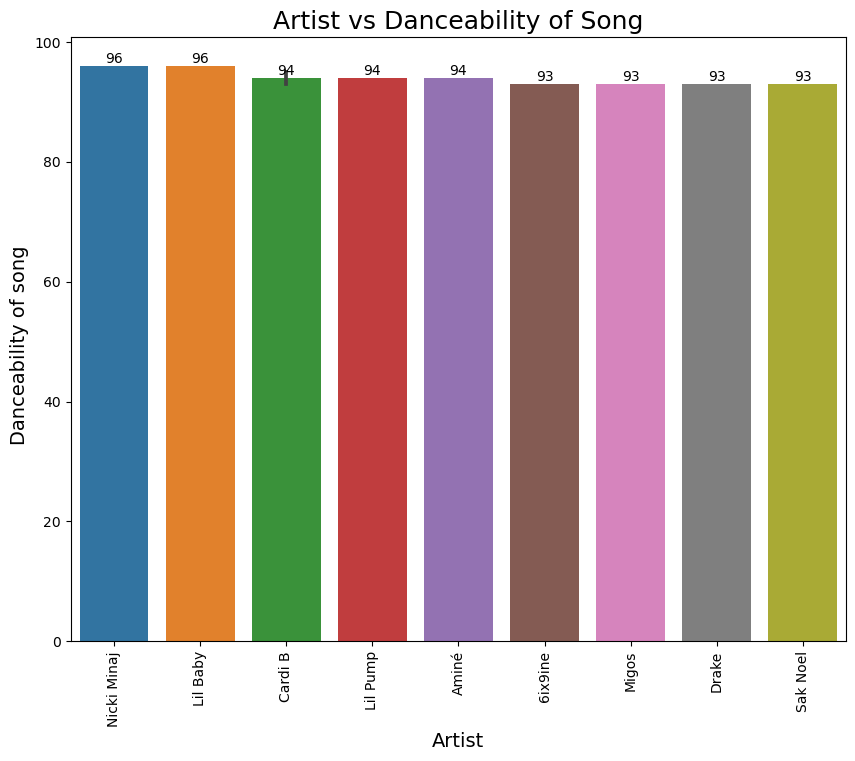

In [160]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_dance.artist,max_dance.danceability_of_song)
plt.xlabel("Artist",fontsize=14)
plt.ylabel("Danceability of song  ",fontsize=14)
plt.title("Artist vs Danceability of Song",fontsize=18)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)


In [171]:
max_dB=data_2010_2019.loudness_of_song.sort_values(ascending=False).head(10)
max_dB

129   -1
23    -1
964   -2
18    -2
128   -2
116   -2
225   -2
284   -2
404   -2
415   -2
Name: loudness_of_song, dtype: int64

In [178]:
max_loudness=data_2010_2019.loc[[129,23,964,18,128,116,225,284,404,415]]
max_loudness

,title,artist,top_genre,year_released,added,beats_per_minute,energy_of_song,danceability_of_song,loudness_of_song,live_recording_extent,positiveness_of_song,duration_of_song,acoustic_level_of_song,extent_of_spoken_words,popularity_of_song,top_year,artist_type
129,Louder,DJ Fresh,dancefloor dnb,2012,2020‑06‑16,140,93,39,-1,35,48,207,2,5,40,2011,Solo
23,Not Afraid,Eminem,detroit hip hop,2010,2022‑02‑17,115,95,86,-1,21,67,248,53,26,85,2010,Solo
964,One Thing Right,Marshmello,brostep,2019,2020‑06‑22,88,63,66,-2,58,44,182,6,5,77,2019,Solo
18,Barbra Streisand (Radio Edit),Duck Sauce,disco house,2010,2022‑02‑17,128,93,76,-2,22,46,195,0,10,61,2010,Duo
128,Coming Home,Diddy - Dirty Money,hip pop,2010,2020‑06‑16,168,84,39,-2,30,23,239,16,19,74,2011,Duo
116,Bounce (feat. Kelis) - Radio Edit,Calvin Harris,dance pop,2012,2020‑06‑16,128,96,78,-2,66,76,222,3,4,67,2011,Solo
225,Hot Right Now - Edit,DJ Fresh,dancefloor dnb,2010,2020‑06‑22,175,96,51,-2,12,39,179,1,4,41,2012,Solo
284,Bangarang (feat. Sirah),Skrillex,brostep,2011,2020‑06‑29,110,97,72,-2,32,58,215,1,20,75,2012,Solo
404,Best Day Of My Life,American Authors,indie poptimism,2014,2020‑06‑10,100,90,67,-2,6,54,194,6,3,83,2014,Band/Group
415,Boom Clap,Charli XCX,art pop,2014,2020‑06‑10,92,91,66,-2,19,58,170,15,8,54,2014,Solo


<AxesSubplot:>

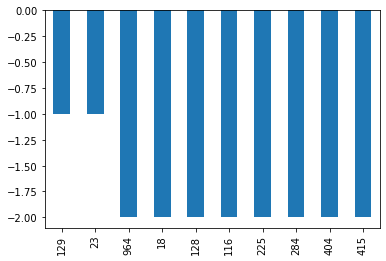

In [167]:
data_2010_2019.loudness_of_song.sort_values(ascending=False).head(10).plot(kind='bar')

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


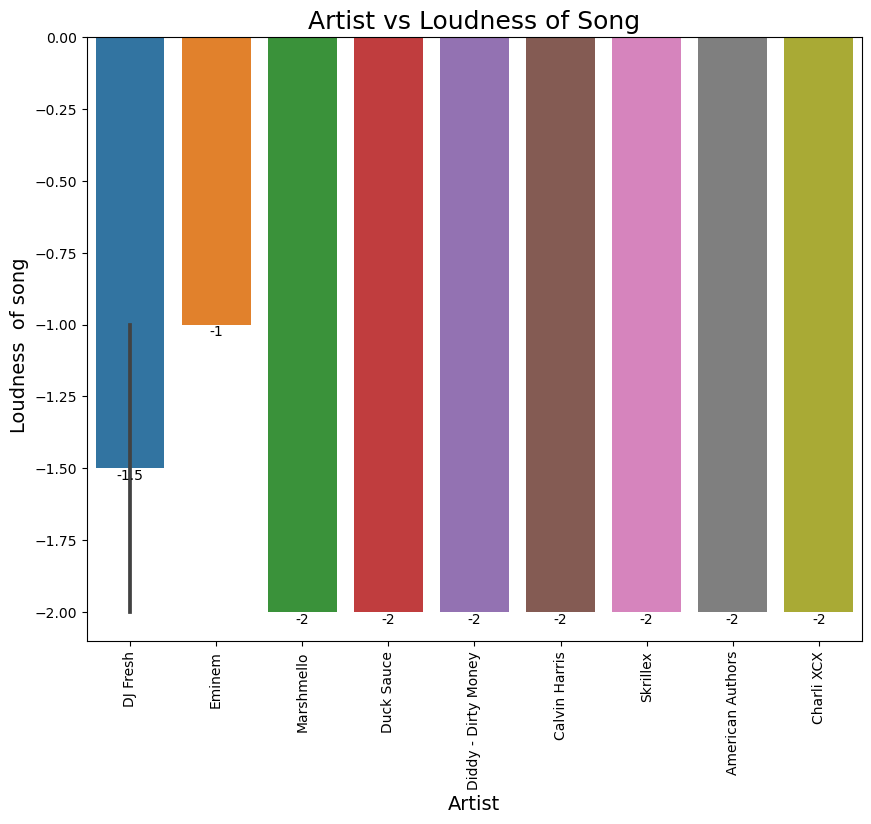

In [177]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_loudness.artist,max_loudness.loudness_of_song)
plt.xlabel("Artist",fontsize=14)
plt.ylabel("Loudness  of song  ",fontsize=14)
plt.title("Artist vs Loudness of Song",fontsize=18)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)


In [179]:
data_2010_2019.live_recording_extent.sort_values(ascending=False).head(10)

92     83
515    82
996    80
662    74
867    74
205    70
282    69
728    69
560    69
56     69
Name: live_recording_extent, dtype: int64

In [181]:
max_live_recording=data_2010_2019.loc[[92,515,996,662,867,205,282,728,560,56]]

In [182]:
max_live_recording

,title,artist,top_genre,year_released,added,beats_per_minute,energy_of_song,danceability_of_song,loudness_of_song,live_recording_extent,positiveness_of_song,duration_of_song,acoustic_level_of_song,extent_of_spoken_words,popularity_of_song,top_year,artist_type
92,Say Aah (feat. Fabolous),Trey Songz,dance pop,2009,2022‑02‑17,93,87,72,-4,83,81,208,0,11,68,2010,Solo
515,Five More Hours,Deorro,dance pop,2017,2020‑06‑19,128,88,70,-3,82,50,212,3,22,74,2015,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
662,NO,Meghan Trainor,dance pop,2017,2020‑06‑08,92,80,56,-4,74,66,214,1,21,75,2016,Solo
867,Spotlight,Marshmello,brostep,2018,2021‑08‑17,150,82,55,-4,74,62,178,1,15,76,2018,Solo
205,R U Mine?,Arctic Monkeys,garage rock,2012,2020‑06‑22,97,79,52,-5,70,68,200,5,3,39,2012,Band/Group
282,Feel the Love (feat. John Newman),Rudimental,dance pop,2013,2020‑06‑22,180,71,39,-7,69,24,245,0,6,52,2012,Band/Group
728,Sit Next to Me,Foster The People,indietronica,2017,2021‑06‑25,97,74,64,-5,69,66,243,12,3,75,2017,Band/Group
560,Time of Our Lives,Pitbull,dance pop,2014,2020‑06‑19,124,80,72,-6,69,72,229,9,6,85,2015,Solo
56,Cooler Than Me - Single Mix,Mike Posner,dance pop,2010,2022‑02‑17,130,82,77,-5,69,63,213,18,5,81,2010,Solo


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


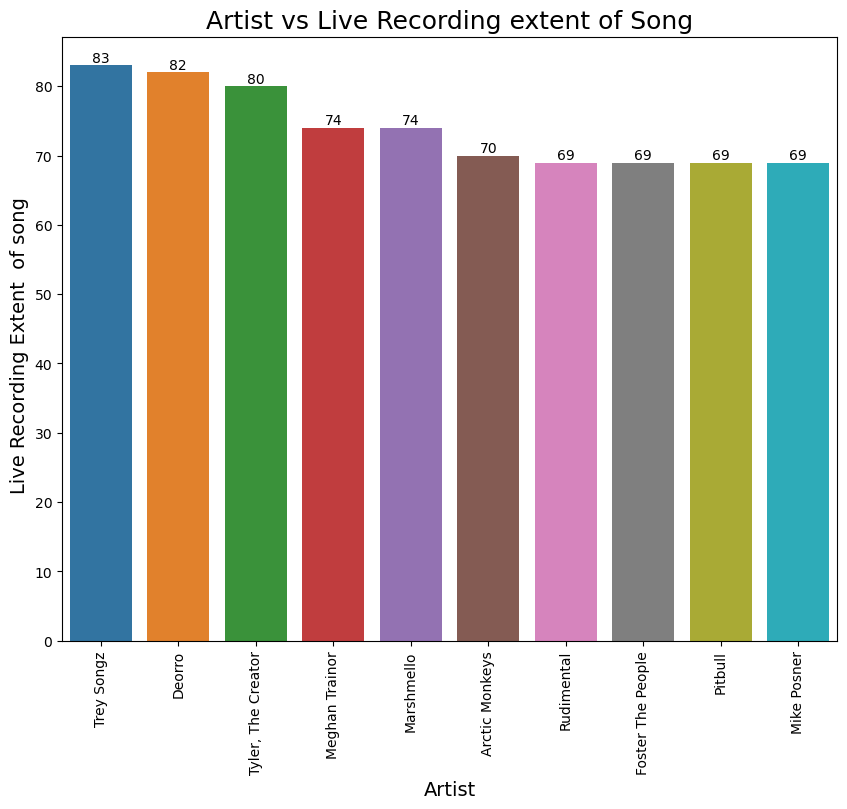

In [183]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_live_recording.artist,max_live_recording.live_recording_extent)
plt.xlabel("Artist",fontsize=14)
plt.ylabel("Live Recording Extent  of song  ",fontsize=14)
plt.title("Artist vs Live Recording extent of Song",fontsize=18)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)


In [184]:
data_2010_2019.positiveness_of_song.sort_values(ascending=False).head(10)

267    97
141    97
115    96
2      96
474    96
455    96
380    95
941    95
371    95
318    94
Name: positiveness_of_song, dtype: int64

In [186]:
high_positiveness_of_song=data_2010_2019.loc[[267,141,115,2,474,455,380,941,371,318]]
high_positiveness_of_song

,title,artist,top_genre,year_released,added,beats_per_minute,energy_of_song,danceability_of_song,loudness_of_song,live_recording_extent,positiveness_of_song,duration_of_song,acoustic_level_of_song,extent_of_spoken_words,popularity_of_song,top_year,artist_type
267,Troublemaker (feat. Flo Rida),Olly Murs,dance pop,2012,2020‑06‑22,106,86,76,-4,13,97,186,2,6,80,2012,Solo
141,Pumped Up Kicks,Foster The People,indietronica,2011,2020‑06‑16,128,71,73,-6,10,97,240,14,3,88,2011,Band/Group
115,The Lazy Song,Bruno Mars,dance pop,2010,2020‑06‑16,175,71,79,-5,10,96,189,30,7,77,2011,Solo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
474,"Happy - From ""Despicable Me 2""",Pharrell Williams,pop rap,2014,2020‑06‑10,160,82,65,-5,9,96,233,22,18,85,2014,Solo
455,All About That Bass,Meghan Trainor,dance pop,2015,2020‑06‑10,134,89,81,-4,12,96,188,6,5,78,2014,Solo
380,Don't Stop the Party (feat. TJR),Pitbull,dance pop,2012,2020‑06‑11,127,96,72,-4,38,95,206,1,9,69,2013,Solo
941,Sucker,Jonas Brothers,boy band,2019,2020‑06‑22,138,73,84,-5,11,95,181,4,6,84,2019,Band/Group
371,Hey Porsche,Nelly,dance pop,2013,2020‑06‑11,116,79,73,-5,65,95,209,15,3,49,2013,Solo
318,Treasure,Bruno Mars,dance pop,2012,2020‑06‑11,116,69,87,-5,32,94,179,4,4,83,2013,Solo


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


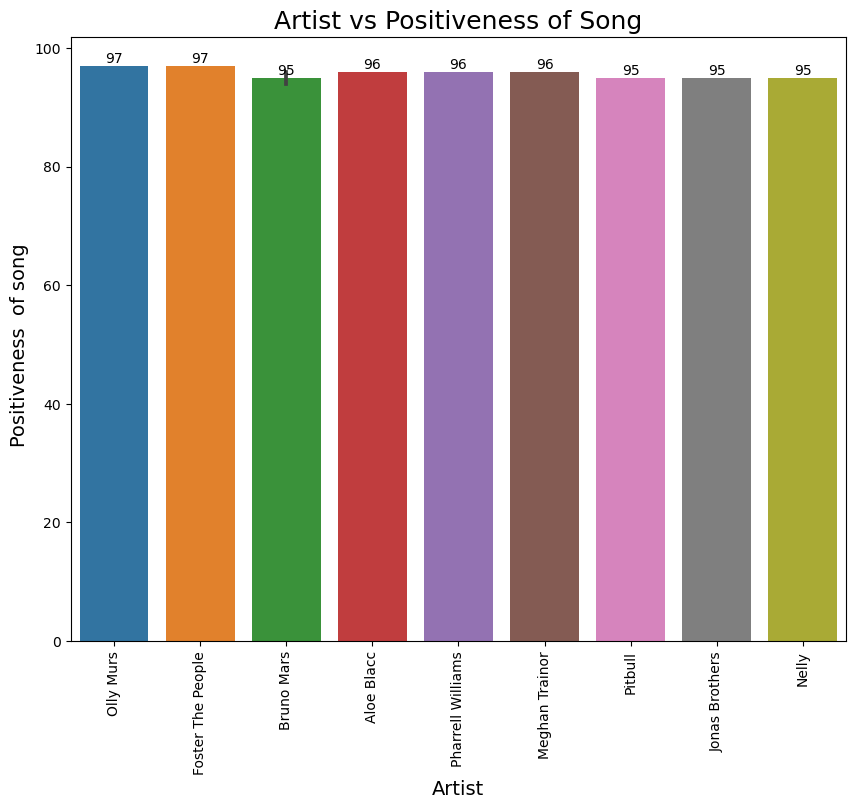

In [187]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_positiveness_of_song.artist,high_positiveness_of_song.positiveness_of_song)
plt.xlabel("Artist",fontsize=14)
plt.ylabel("Positiveness  of song  ",fontsize=14)
plt.title("Artist vs Positiveness of Song",fontsize=18)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)


In [188]:
data_2010_2019.duration_of_song.sort_values(ascending=False).head(10)

443    688
350    484
873    418
329    354
982    354
248    350
686    348
764    343
347    338
110    337
Name: duration_of_song, dtype: int64

In [189]:
max_duration_song=data_2010_2019.loc[[443,350,873,329,982,248,686,764,347,110]]
max_duration_song

,title,artist,top_genre,year_released,added,beats_per_minute,energy_of_song,danceability_of_song,loudness_of_song,live_recording_extent,positiveness_of_song,duration_of_song,acoustic_level_of_song,extent_of_spoken_words,popularity_of_song,top_year,artist_type
443,Not a Bad Thing,Justin Timberlake,dance pop,2013,2020‑06‑10,86,56,31,-9,13,11,688,53,7,61,2014,Solo
350,Mirrors,Justin Timberlake,dance pop,2013,2020‑06‑11,77,51,57,-7,9,51,484,23,5,83,2013,Solo
873,Te Boté - Remix,Nio Garcia,latin,2018,2020‑06‑22,97,68,90,-3,6,44,418,54,21,81,2018,Solo
329,Lose Yourself to Dance (feat. Pharrell Williams),Daft Punk,electro,2013,2020‑06‑11,100,66,83,-8,8,67,354,8,6,74,2013,Duo
982,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975,2020‑06‑22,144,40,39,-10,24,23,354,29,5,77,2019,Band/Group
248,m.A.A.d city,Kendrick Lamar,conscious hip hop,2012,2020‑06‑22,91,73,49,-7,44,22,350,5,27,73,2012,Solo
686,Somebody Else,The 1975,modern alternative rock,2016,2020‑06‑08,101,79,61,-6,15,47,348,20,6,76,2016,Band/Group
764,Bad and Boujee (feat. Lil Uzi Vert),Migos,atl hip hop,2017,2021‑01‑28,127,67,93,-5,12,17,343,6,24,78,2017,Trio
347,Holy Grail,JAY-Z,east coast hip hop,2013,2020‑06‑11,145,53,68,-7,26,16,338,6,8,68,2013,Solo
110,Holocene,Bon Iver,eau claire indie,2011,2020‑06‑16,148,30,37,-15,13,15,337,94,3,70,2011,Band/Group


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


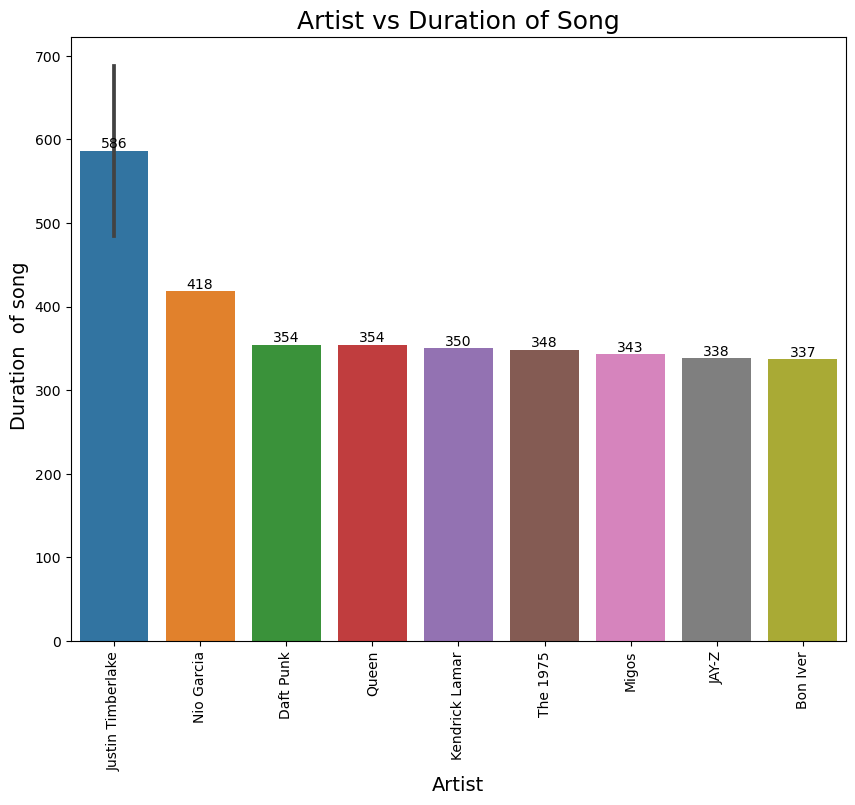

In [190]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_duration_song.artist,max_duration_song.duration_of_song)
plt.xlabel("Artist",fontsize=14)
plt.ylabel("Duration  of song  ",fontsize=14)
plt.title("Artist vs Duration of Song",fontsize=18)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)


In [191]:
data_2010_2019.acoustic_level_of_song.sort_values(ascending=False).head(10)

916    98
675    97
291    95
107    95
110    94
359    93
914    93
317    93
809    93
754    92
Name: acoustic_level_of_song, dtype: int64

In [192]:
high_acoustic_level=data_2010_2019.loc[[916,675,291,107,110,359,914,317,809,754]]
high_acoustic_level

,title,artist,top_genre,year_released,added,beats_per_minute,energy_of_song,danceability_of_song,loudness_of_song,live_recording_extent,positiveness_of_song,duration_of_song,acoustic_level_of_song,extent_of_spoken_words,popularity_of_song,top_year,artist_type
916,when the party's over,Billie Eilish,art pop,2019,2020‑06‑22,83,11,37,-14,9,20,196,98,10,85,2019,Solo
675,Lost Boy,Ruth B.,alt z,2015,2020‑06‑08,124,6,71,-15,9,35,275,97,5,77,2016,Solo
291,Angels,The xx,downtempo,2012,2020‑06‑22,92,16,42,-18,10,34,172,95,4,68,2012,Band/Group
107,Skinny Love,Birdy,pop,2011,2020‑06‑16,166,29,38,-8,12,17,201,95,5,77,2011,Solo
110,Holocene,Bon Iver,eau claire indie,2011,2020‑06‑16,148,30,37,-15,13,15,337,94,3,70,2011,Band/Group
359,Somewhere Only We Know,Lily Allen,dance pop,2014,2020‑06‑11,81,29,31,-11,10,29,209,93,3,56,2013,Solo
914,lovely (with Khalid),Billie Eilish,art pop,2018,2020‑06‑22,115,30,35,-10,10,12,200,93,3,91,2019,Solo
317,When I Was Your Man,Bruno Mars,dance pop,2012,2020‑06‑11,73,28,61,-9,9,39,214,93,4,89,2013,Solo
809,lovely (with Khalid),Billie Eilish,art pop,2018,2020‑06‑22,115,30,35,-10,10,12,200,93,3,91,2018,Solo
754,Liability,Lorde,art pop,2017,2021‑06‑25,76,23,59,-11,10,38,172,92,13,79,2017,Solo


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


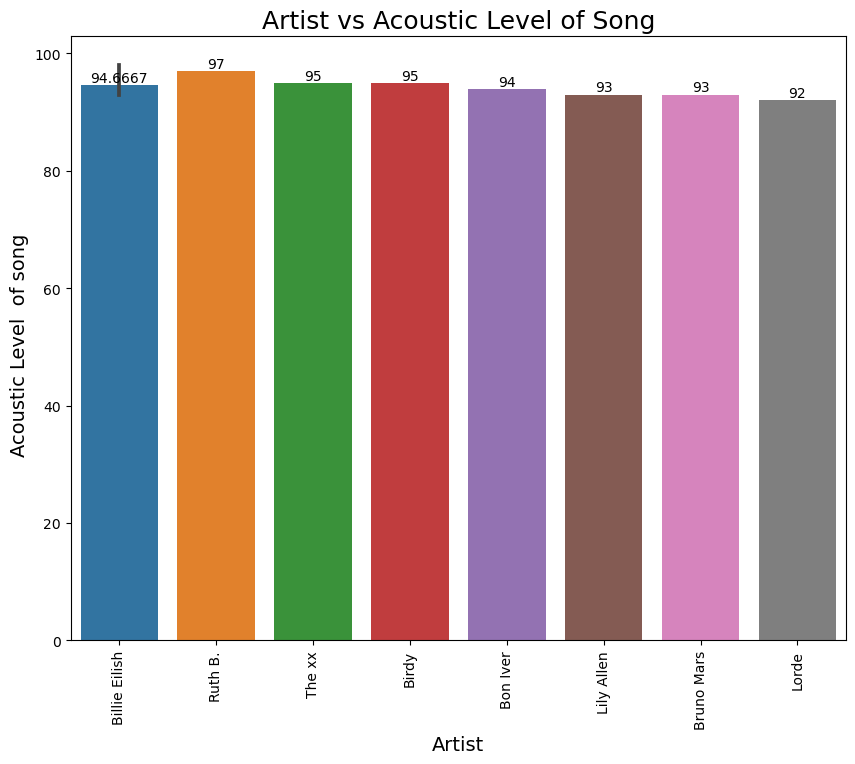

In [194]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_acoustic_level.artist,high_acoustic_level.acoustic_level_of_song)
plt.xlabel("Artist",fontsize=14)
plt.ylabel("Acoustic Level  of song  ",fontsize=14)
plt.title("Artist vs Acoustic Level of Song",fontsize=18)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)


In [197]:
data_2010_2019.extent_of_spoken_words.sort_values(ascending=False).head(10)

856    53
834    52
705    51
742    49
984    48
976    47
910    46
800    46
131    45
26     45
Name: extent_of_spoken_words, dtype: int64

In [198]:
max_word_spoken=data_2010_2019.loc[[856,834,705,984,976,910,800,131,26]]
max_word_spoken

,title,artist,top_genre,year_released,added,beats_per_minute,energy_of_song,danceability_of_song,loudness_of_song,live_recording_extent,positiveness_of_song,duration_of_song,acoustic_level_of_song,extent_of_spoken_words,popularity_of_song,top_year,artist_type
856,Yes Indeed,Lil Baby,atl hip hop,2018,2020‑06‑22,120,35,96,-9,11,56,142,4,53,84,2018,Solo
834,River (feat. Ed Sheeran),Eminem,detroit hip hop,2017,2020‑06‑22,90,75,75,-6,7,66,221,14,52,77,2018,Solo
705,Caroline,Aminé,hip hop,2017,2021‑01‑28,120,34,94,-10,26,71,210,17,51,80,2017,Solo
984,Keisha & Becky - Remix,Russ Millions,uk drill,2019,2020‑08‑20,141,47,86,-10,12,64,253,25,48,73,2019,Solo
976,Pop Out (feat. Lil Tjay),Polo G,chicago rap,2019,2020‑06‑22,168,64,77,-7,7,26,167,15,47,83,2019,Solo
910,boyfriend (with Social House),Ariana Grande,dance pop,2019,2020‑06‑22,190,80,40,-4,16,70,186,12,46,81,2019,Solo
800,Youngblood,5 Seconds of Summer,boy band,2018,2020‑06‑22,120,85,60,-5,12,15,203,2,46,74,2018,Band/Group
131,I Need A Doctor,Dr. Dre,g funk,2011,2020‑06‑16,156,95,59,-5,31,40,284,9,45,77,2011,Solo
26,Like A G6,Far East Movement,asian american hip hop,2010,2022‑02‑17,125,84,44,-8,12,78,217,1,45,75,2010,Band/Group


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


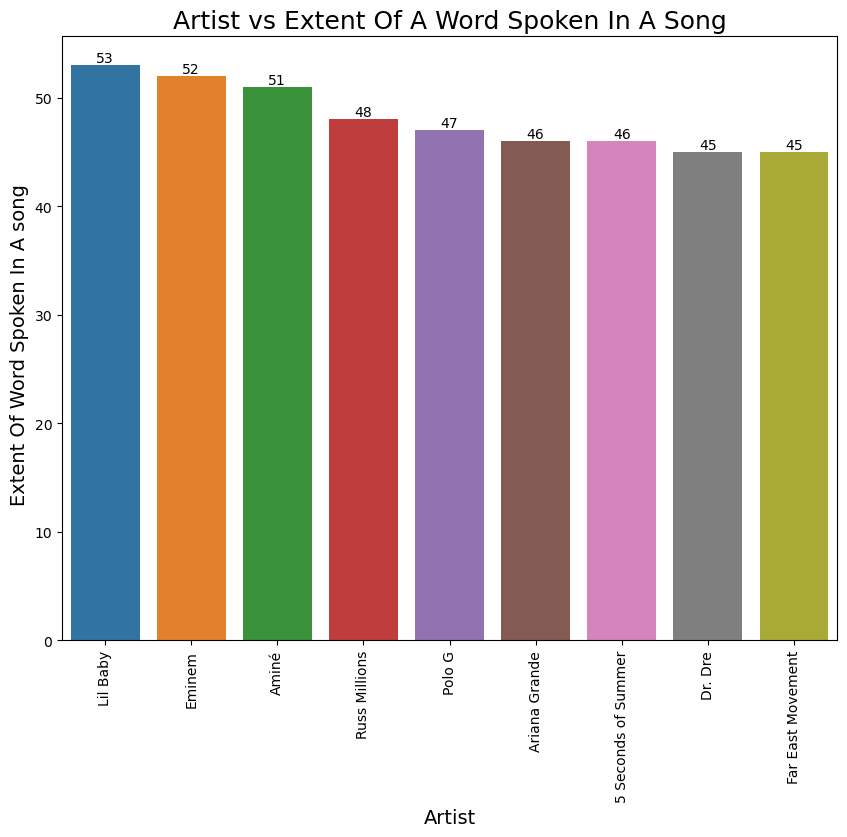

In [199]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_word_spoken.artist,max_word_spoken.extent_of_spoken_words)
plt.xlabel("Artist",fontsize=14)
plt.ylabel("Extent Of Word Spoken In A song  ",fontsize=14)
plt.title("Artist vs Extent Of A Word Spoken In A Song",fontsize=18)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)


In [201]:
data_2010_2019['popularity_of_song'].sort_values(ascending=False).head(10)

392    95
394    94
211    91
809    91
231    91
736    91
316    91
914    91
442    90
302    90
Name: popularity_of_song, dtype: int64

In [202]:
high_popularity=data_2010_2019.loc[[392,394,211,809,231,736,316,914,442,302]]
high_popularity

,title,artist,top_genre,year_released,added,beats_per_minute,energy_of_song,danceability_of_song,loudness_of_song,live_recording_extent,positiveness_of_song,duration_of_song,acoustic_level_of_song,extent_of_spoken_words,popularity_of_song,top_year,artist_type
392,Sweater Weather,The Neighbourhood,modern alternative rock,2013,2020‑06‑11,124,81,61,-3,10,40,240,5,3,95,2013,Band/Group
394,Another Love,Tom Odell,chill pop,2013,2020‑06‑11,123,54,45,-9,9,13,244,70,4,94,2013,Solo
211,Locked out of Heaven,Bruno Mars,dance pop,2012,2020‑06‑11,144,70,73,-4,31,87,233,5,4,91,2012,Solo
809,lovely (with Khalid),Billie Eilish,art pop,2018,2020‑06‑22,115,30,35,-10,10,12,200,93,3,91,2018,Solo
231,Lost,Frank Ocean,alternative r&b,2012,2020‑06‑22,123,60,91,-5,17,50,234,3,23,91,2012,Solo
736,Believer,Imagine Dragons,modern rock,2017,2021‑01‑28,125,78,78,-4,8,67,204,6,13,91,2017,Band/Group
316,Locked out of Heaven,Bruno Mars,dance pop,2012,2020‑06‑11,144,70,73,-4,31,87,233,5,4,91,2013,Solo
914,lovely (with Khalid),Billie Eilish,art pop,2018,2020‑06‑22,115,30,35,-10,10,12,200,93,3,91,2019,Solo
442,All of Me,John Legend,neo soul,2013,2020‑06‑10,120,26,42,-7,13,33,270,92,3,90,2014,Solo
302,Why'd You Only Call Me When You're High?,Arctic Monkeys,garage rock,2013,2020‑06‑11,92,63,69,-6,10,80,161,5,4,90,2013,Band/Group


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


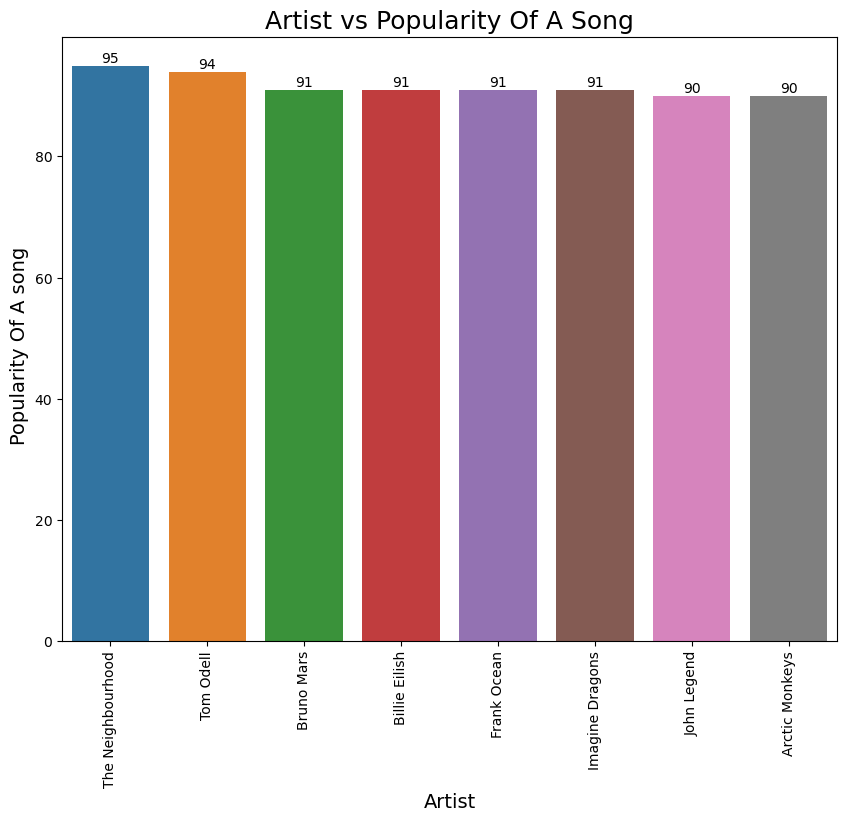

In [203]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(high_popularity.artist,high_popularity.popularity_of_song)
plt.xlabel("Artist",fontsize=14)
plt.ylabel("Popularity Of A song  ",fontsize=14)
plt.title("Artist vs Popularity Of A Song",fontsize=18)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)


<AxesSubplot:>

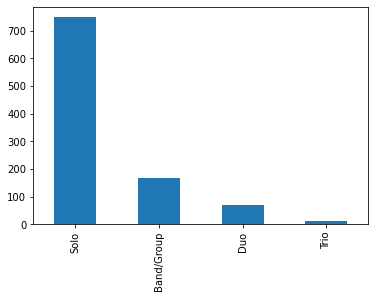

In [205]:
data_2010_2019.artist_type.value_counts().sort_values(ascending=False).head(10)

<AxesSubplot:>

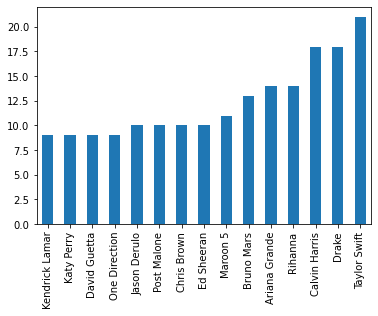

In [196]:
data_2010_2019.artist.value_counts().sort_values(ascending=True).tail(15).plot(kind="bar")